# Session 16
(2/07/2021)
## Gradient Descent

## Data 

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [59]:
X, y = make_regression(n_samples=200, n_features=3, random_state=0)
print(X.shape, y.shape)

(200, 3) (200,)


In [60]:
y = y.reshape(-1,1)
print(y.shape)

(200, 1)


In [67]:
class LinearRegression:

    def __get_gradient(self, X, y):
        gradient = []
        for  i in range(X.shape[1]):
            grad = -2*( ( (y - self.predict(X))* (X[:,i].reshape(-1,1)) ).sum() ) 
            gradient.append(grad)
        return np.array(gradient).reshape(-1,1)

    def __gradient_descent(self, X, y, learning_rate, epochs, batch_size):

        # start with any random weights
        self.w = np.random.randn(X.shape[1]).reshape(-1,1)
        # self.w = np.zeros((X.shape[1], 1)) 

        idx = np.arange(0,X.shape[0])

        losses = []

        for i in range(epochs):
            random_idx = np.random.choice(idx, size = batch_size)

            # update rule
            self.w = self.w - learning_rate*self.__get_gradient(X[random_idx], y[random_idx])

            ypred = self.predict(X)
            loss = self.loss(y, ypred)
            r2_score = self.r_squared(y, ypred)
            losses.append(loss)
            print(f"epoch: {i}, loss: {loss}, r2: {r2_score}") 

        return losses


    def fit(self, X, y, method="batch", learning_rate=0.001, epochs=300, **kwargs):
        """ Training the model"""
        X = X.copy()
        ones_column = np.ones((len(X),1))
        X = np.concatenate([ones_column, X], axis=1)

        if method == "batch":
            batch_size = X.shape[0] # all the samples

        elif method == "mini-batch":
            if kwargs.get('batch_size') == None:
                batch_size = int(X.shape[0]*0.25)
            else:
                batch_size = kwargs['batch_size']

        elif method == 'stochastic':
            batch_size = 1

        return self.__gradient_descent(X, y, learning_rate, epochs, batch_size)
        
        

    def predict(self, X):
        return X.dot(self.w)

    def loss(self, y, ypred):
        return ((y - ypred)**2).sum()

    def r_squared(self, ytrue, ypred):
        e_method = ((ytrue-ypred)**2).sum() # sum of squares of residuals
        e_baseline = ((ytrue-ytrue.mean())**2).sum() # total sum of squares
        return 1 - e_method/e_baseline

In [68]:
lr = LinearRegression()

In [69]:
losses = lr.fit(X, y, method='batch', learning_rate=0.001, epochs = 50)
print(lr.w)

epoch: 0, loss: 489424.1640931644, r2: 0.6827404143429479
epoch: 1, loss: 140697.78693105033, r2: 0.9087954276484963
epoch: 2, loss: 47821.632704236516, r2: 0.9690005674213058
epoch: 3, loss: 16021.21523304857, r2: 0.9896145624195378
epoch: 4, loss: 7518.929205798389, r2: 0.9951260020664565
epoch: 5, loss: 3547.0714409515504, r2: 0.997700680721931
epoch: 6, loss: 1666.1476004620356, r2: 0.9989199525970576
epoch: 7, loss: 748.7915604227699, r2: 0.9995146106023527
epoch: 8, loss: 389.15069744497174, r2: 0.9997477407163614
epoch: 9, loss: 202.21608819470666, r2: 0.9998689173991384
epoch: 10, loss: 96.45971844171328, r2: 0.9999374718852263
epoch: 11, loss: 36.04569793979614, r2: 0.9999766340854578
epoch: 12, loss: 18.368613547901365, r2: 0.9999880929076436
epoch: 13, loss: 9.834504046001884, r2: 0.9999936249762319
epoch: 14, loss: 4.460911233287808, r2: 0.999997108302055
epoch: 15, loss: 2.2464165186927634, r2: 0.9999985438046868
epoch: 16, loss: 1.164259710194024, r2: 0.999999245291548
ep

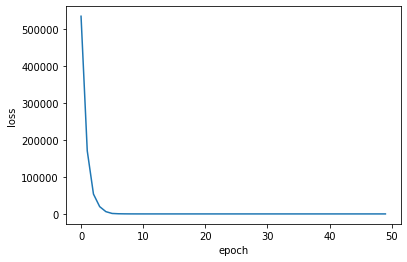

In [56]:
plt.plot(losses)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [57]:
b = 2*np.ones((4,))
np.ones((4,1)) * b

array([[2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.]])

## Loss visualization
(5/07/2021)

In [70]:
# Data generation
c = -4
m = 30
x = np.linspace(-10, 10, 100)

y = m*x + c


In [72]:
X, y, coef = make_regression(100, 1, random_state=10, noise=0.3, bias=-4, coef=True)
print(X.shape, y.shape, coef)

y = m*x + c

(100, 1) (100,) 29.972987242456284


In [81]:
def loss(m=29.97, c=-4):

    return ((2 - (1*m + c))**2)

# def predict(X, m=29.97, c=-4):
#     return X*m + c

In [87]:
M = np.linspace(-10, 10, 50)
C = np.linspace(-10, 10, 50)

M, C = np.meshgrid(M, C)
print(M.shape, C.shape)

ypred = predict(X)
print(ypred.shape)

L = loss(M.reshape(-1,1), C.reshape(-1,1))
L = L.reshape(-1, 50)
print(L.shape)



(50, 50) (50, 50)
(100, 1)
(50, 50)


In [88]:
from mpl_toolkits import mplot3d

Text(0.5, 0, 'Loss')

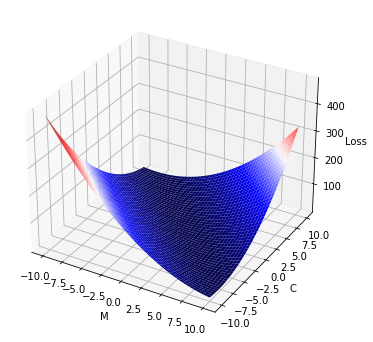

In [91]:
fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection='3d')

ax.plot_surface(M, C, L, cmap='seismic')
ax.set_xlabel('M')
ax.set_ylabel('C')
ax.set_zlabel('Loss')
